In [14]:
# imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token("pk.eyJ1IjoiYW1hY2s1NiIsImEiOiJja3RldzZmcnAwMmd5Mm5wZngyejR2cm5iIn0.JohlA6vRxmH-iugH7u_xXA")

# Import all the CSVs from the Data of the last 10 years

file_path_2010 = Path("../Data/RawData/2010.csv")
file_path_2011 = Path("../Data/RawData/2011.csv")
file_path_2012 = Path("../Data/RawData/2012.csv")
file_path_2013 = Path("../Data/RawData/2013.csv")
file_path_2014 = Path("../Data/RawData/2014.csv")
file_path_2015 = Path("../Data/RawData/2015.csv")
file_path_2016 = Path("../Data/RawData/2016.csv")
file_path_2017 = Path("../Data/RawData/2017.csv")
file_path_2018 = Path("../Data/RawData/2018.csv")
file_path_2019 = Path("../Data/RawData/2019.csv")
coor_path = Path("../Data/RawData/coordinates.csv")

# Convert the data to DataFrames and add a Year column

data_2010 = pd.read_csv(file_path_2010)
data_2010['Year'] = '2010'
data_2011 = pd.read_csv(file_path_2011)
data_2011['Year'] = '2011'
data_2012 = pd.read_csv(file_path_2012)
data_2012['Year'] = '2012'
data_2013 = pd.read_csv(file_path_2013)
data_2013['Year'] = '2013'
data_2014 = pd.read_csv(file_path_2014)
data_2014['Year'] = '2014'
data_2015 = pd.read_csv(file_path_2015)
data_2015['Year'] = '2015'
data_2016 = pd.read_csv(file_path_2016)
data_2016['Year'] = '2016'
data_2017 = pd.read_csv(file_path_2017)
data_2017['Year'] = '2017'
data_2018 = pd.read_csv(file_path_2018)
data_2018['Year'] = '2018'
data_2019 = pd.read_csv(file_path_2019)
data_2019['Year'] = '2019'
coordinates = pd.read_csv(coor_path)

# Select specific columns desired to play with the data

data_2010 = data_2010[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2011 = data_2011[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2012 = data_2012[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2013 = data_2013[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2014 = data_2014[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2015 = data_2015[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2016 = data_2016[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2017 = data_2017[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2018 = data_2018[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2019 = data_2019[["Year","Player","Tm","Pos","FantasyPoints"]]
coordinates.drop(labels=['zip', 'pic', 'Unnamed: 6', 'Conference'], axis=1, inplace=True)
coordinates = coordinates.set_index('Team')

# Set the index as the year

data_2010 = data_2010.set_index("Year")
data_2011 = data_2011.set_index("Year")
data_2012 = data_2012.set_index("Year")
data_2013 = data_2013.set_index("Year")
data_2014 = data_2014.set_index("Year")
data_2015 = data_2015.set_index("Year")
data_2016 = data_2016.set_index("Year")
data_2017 = data_2017.set_index("Year")
data_2018 = data_2018.set_index("Year")
data_2019 = data_2019.set_index("Year")

# Merge all the data and clean it by eliminating players that don't have any points, or a single team

full_data = pd.concat([data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019])
full_data = full_data[full_data['FantasyPoints'] != 0]
full_data = full_data[full_data['Tm'] != '2TM']
full_data = full_data[full_data['Tm'] != '3TM']
full_data = full_data[full_data['Tm'] != '4TM']
full_data.to_csv('../Data/CleanData/full_data.csv', encoding='utf-8')

player_mean = full_data.groupby(['Player', 'Tm']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
player_mean.hvplot.bar(width=800, rot=90, groupby="Tm")

:DynamicMap   [Tm]
   :Bars   [Player,Tm]   (FantasyPoints)

In [8]:
team_mean = full_data.groupby(['Tm']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
team_mean.hvplot.bar(width=800, rot=90).opts(color="Tm")

:Bars   [Tm]   (FantasyPoints)

In [6]:
position_mean = full_data.groupby(['Pos']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
position_mean.hvplot.bar(width=800, rot=90)

:Bars   [Pos]   (FantasyPoints)

In [56]:
best_team = full_data.groupby(['Player']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first').nlargest(15, 'FantasyPoints')
best_team.hvplot.bar(width=800, rot=90)

:Bars   [Player]   (FantasyPoints)

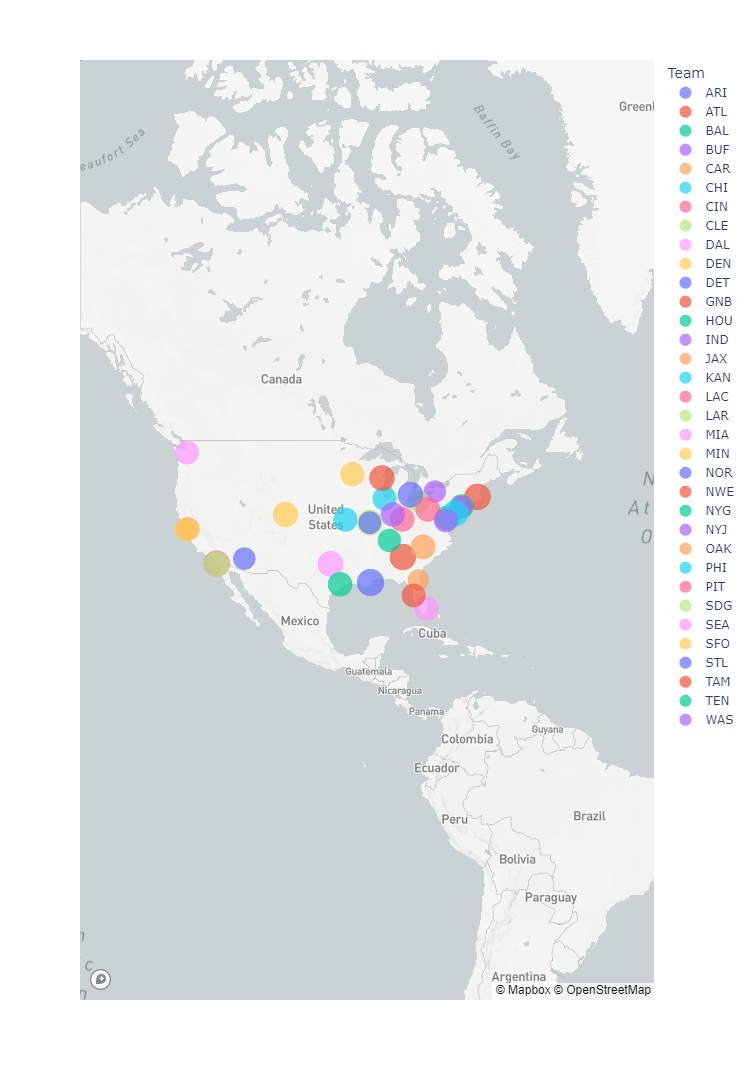

In [57]:
coords_and_mean = pd.concat([team_mean, coordinates], axis=1)
coords_and_mean = coords_and_mean.reset_index()
coords_and_mean = coords_and_mean.rename({'index': 'Team'}, axis=1)

coor_mapbox = px.scatter_mapbox(coords_and_mean, lat='latitude', lon='longitude', color="Team", size="FantasyPoints", zoom=2)
coor_mapbox.show()

[[1.         0.45440067]
 [0.45440067 1.        ]]


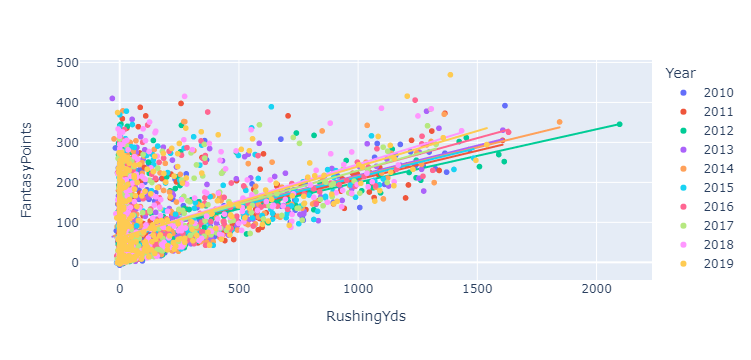

In [58]:
data_2010_yds = pd.read_csv(file_path_2010)
data_2010_yds['Year'] = '2010'
data_2011_yds = pd.read_csv(file_path_2011)
data_2011_yds['Year'] = '2011'
data_2012_yds = pd.read_csv(file_path_2012)
data_2012_yds['Year'] = '2012'
data_2013_yds = pd.read_csv(file_path_2013)
data_2013_yds['Year'] = '2013'
data_2014_yds = pd.read_csv(file_path_2014)
data_2014_yds['Year'] = '2014'
data_2015_yds = pd.read_csv(file_path_2015)
data_2015_yds['Year'] = '2015'
data_2016_yds = pd.read_csv(file_path_2016)
data_2016_yds['Year'] = '2016'
data_2017_yds = pd.read_csv(file_path_2017)
data_2017_yds['Year'] = '2017'
data_2018_yds = pd.read_csv(file_path_2018)
data_2018_yds['Year'] = '2018'
data_2019_yds = pd.read_csv(file_path_2019)
data_2019_yds['Year'] = '2019'
data_2010_yds = data_2010_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2011_yds = data_2011_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2012_yds = data_2012_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2013_yds = data_2013_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2014_yds = data_2014_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2015_yds = data_2015_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2016_yds = data_2016_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2017_yds = data_2017_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2018_yds = data_2018_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2019_yds = data_2019_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
full_data_yds = pd.concat([data_2010_yds, data_2011_yds, data_2012_yds, data_2013_yds, data_2014_yds, 
                           data_2015_yds, data_2016_yds, data_2017_yds, data_2018_yds, data_2019_yds])
full_data_yds = full_data_yds[full_data_yds['FantasyPoints'] != 0]
full_data_yds = full_data_yds[full_data_yds['Tm'] != '2TM']
full_data_yds = full_data_yds[full_data_yds['Tm'] != '3TM']
full_data_yds = full_data_yds[full_data_yds['Tm'] != '4TM']

corr = np.corrcoef(full_data_yds["RushingYds"], full_data_yds["FantasyPoints"])
print(corr)

fig = px.scatter(full_data_yds, x="RushingYds", y="FantasyPoints", trendline="ols", color='Year')
fig.show()

In [59]:
full_data_yds.hvplot.scatter(x='RushingYds', y='FantasyPoints', c='Year', groupby="Year")

:DynamicMap   [Year]
   :Scatter   [RushingYds]   (FantasyPoints,Year)